In [141]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Lecture 12:  Perceptron, Cross-validation, and Multiclass classification


A perceptron is a simple supervised learning linear binary classifier. It is a very simple, single layer neural network.

The classifier is a function that maps its input $\mathbf{x} = \{x_1,x_2,...,x_n\}$ to a prediction $f(\mathbf{x})$:

$$
f(\mathbf{x}) = \begin{cases}1 & \text{if }\ \mathbf{w} \cdot \mathbf{x} + b > 0,\\0 & \text{otherwise}\end{cases}
$$


Here's an illustration of how perceptron classifier works.

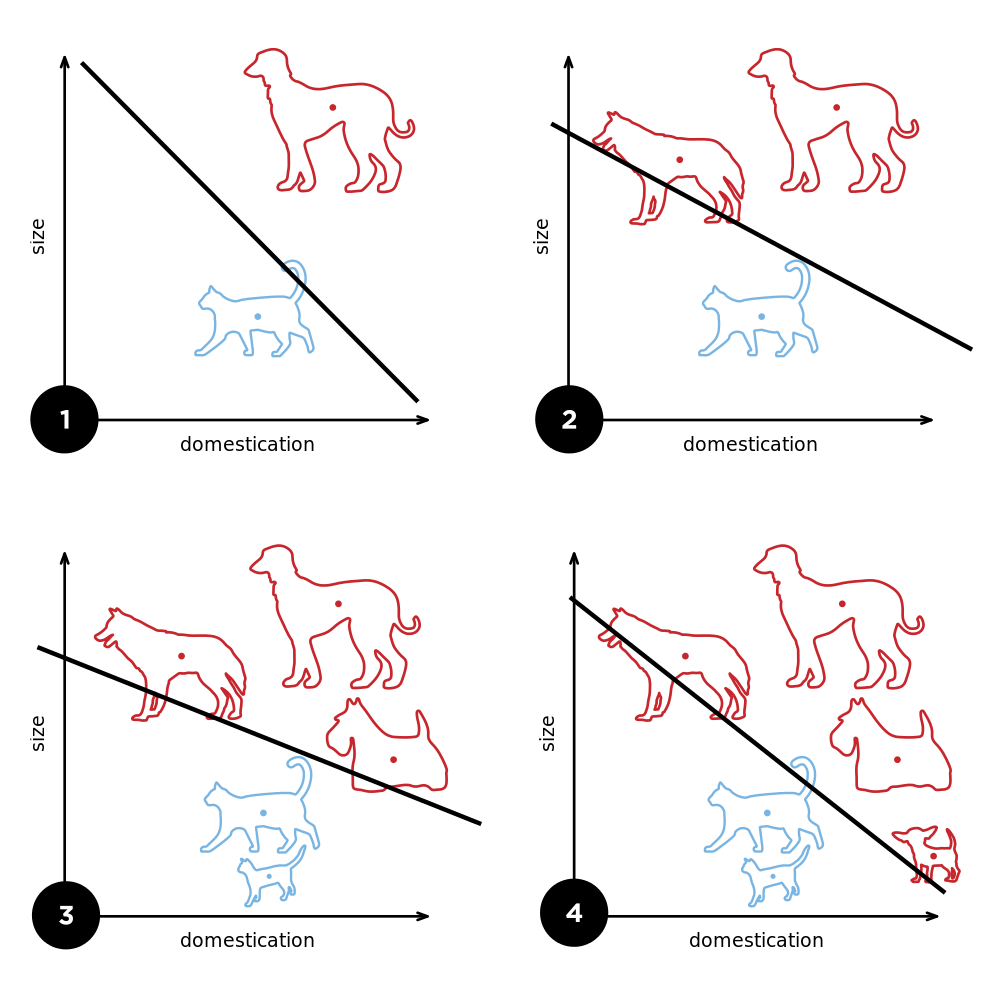

Check out these cool visualiations of perceptron training:

- https://www.cs.utexas.edu/~teammco/misc/perceptron/
- http://www.nbertagnolli.com/jekyll/update/2015/08/27/Perceptron_Vis.html

In [142]:
# load the iris data
df = pd.read_csv('data/iris.csv')
df['species_label'], _ = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_label
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


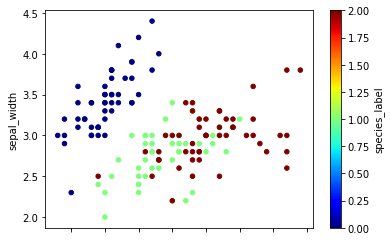

In [143]:
df.plot(x='sepal_length', y='sepal_width',kind='scatter',c='species_label',colormap='jet')

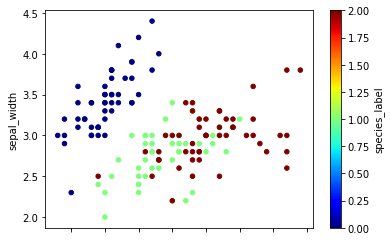

In [144]:
df.plot(x='sepal_length', y='sepal_width',kind='scatter',c='species_label',colormap='jet')

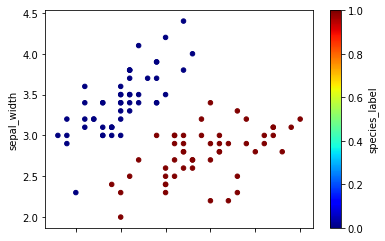

In [145]:
# only work with class 0 and class 1
df[df['species_label'].isin([0,1])].plot(x='sepal_length', y='sepal_width',kind='scatter',c='species_label',colormap='jet')

X = df[df['species_label'].isin([0,1])][['sepal_length', 'sepal_width']]
y = df[df['species_label'].isin([0,1])]['species_label']


In [146]:
# split data randomly into 70% training and 30% test
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

In [147]:
# standardize the features
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Train the model


In [148]:
from sklearn import linear_model

# train a perceptron
ppn = linear_model.Perceptron(random_state=0, max_iter=100, tol=1e-6)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
      fit_intercept=True, max_iter=100, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=1e-06,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [149]:
# use the trained perceptron to make predictions with the test data
y_pred = ppn.predict(X_test_std)

### Evaluate the model's performance


In [150]:
from sklearn import metrics 
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 0
Accuracy: 1.00


In [151]:
from matplotlib.colors import ListedColormap


def plot_decision(X, y, classifier, test_idx=None, resolution=0.02, figsize=(10,6)):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('#cc0000', '#003399', '#00cc00', '#999999', '#66ffff')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # get dimensions
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    xmin = xx1.min()
    xmax = xx1.max()
    ymin = xx2.min()
    ymax = xx2.max()
    
    # create the figure
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    # plot the decision surface
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap, zorder=1)
    
    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], 
                   y=X[y == cl, 1],
                   alpha=0.6, 
                   c=(cmap(idx),),
                   edgecolor='black',
                   marker='o',#markers[idx],
                   s=50,
                   label=cl,
                   zorder=3)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        ax.scatter(X_test[:, 0],
                   X_test[:, 1],
                   c='w',
                   alpha=1.0,
                   edgecolor='black',
                   linewidths=1,
                   marker='o',
                   s=150, 
                   label='test set',
                   zorder=2)

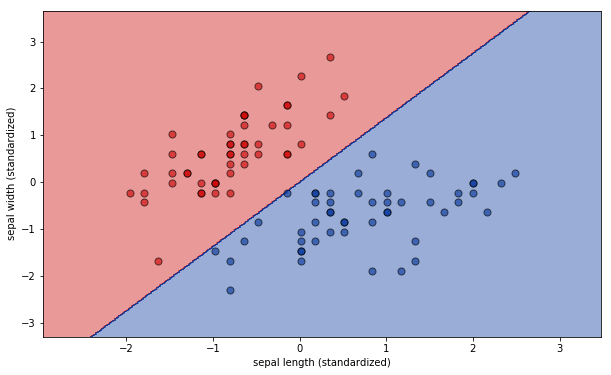

In [152]:
# visualize the model's decision regions to see how it separates the samples
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision(X=X_combined_std, y=y_combined, classifier=ppn)
plt.xlabel('sepal length (standardized)')
plt.ylabel('sepal width (standardized)')
#plt.legend(loc='upper left')
plt.show()

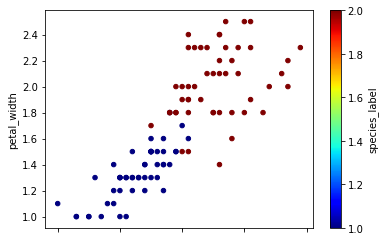

In [153]:
# Let's try again with different features
df[df['species_label'].isin([1,2])].plot(x='petal_length', y='petal_width',kind='scatter',c='species_label',colormap='jet')

X = df[df['species_label'].isin([1,2])][['petal_length', 'petal_width']]
y = df[df['species_label'].isin([1,2])]['species_label']


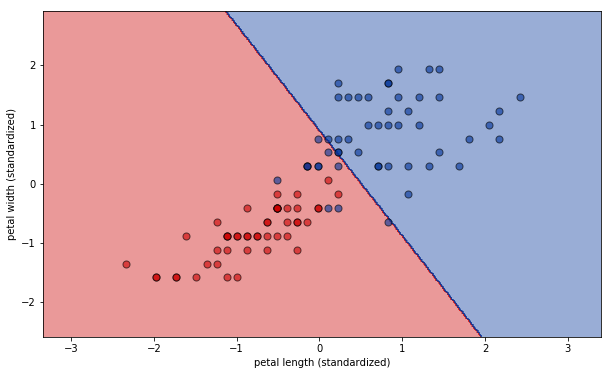

In [154]:
# split data randomly into 70% training and 30% test
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# standardize the features
from sklearn import preprocessing
sc = preprocessing.StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# train a perceptron
ppn = linear_model.Perceptron(random_state=0, max_iter=100, tol=1e-6)
ppn.fit(X_train_std, y_train)

# use the trained perceptron to make predictions with the test data
y_pred = ppn.predict(X_test_std)

# visualize the model's decision regions to see how it separates the samples
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision(X=X_combined_std, y=y_combined, classifier=ppn)
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
#plt.legend(loc='upper left')
plt.show()

## Cross Validation

A key challenge with overfitting, and with machine learning in general, is that we can’t know how well our model will perform on new data until we actually test it.

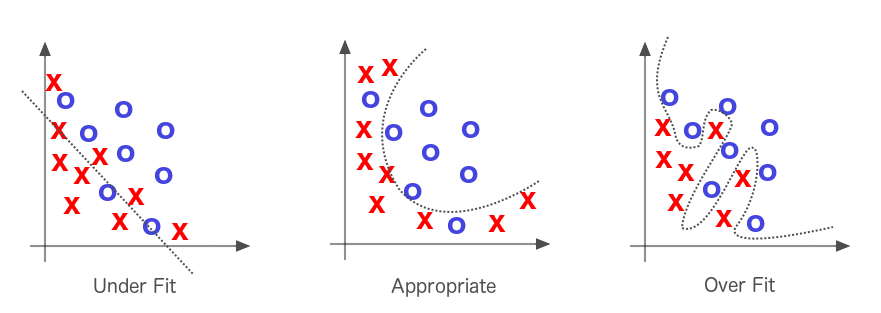

To address this, we can split our initial dataset into separate training and test subsets. We have done this in the past few lectures. However, spilting into a single train and test set and getting a good test result could be a fluke. A more realiable method is called "cross validation"


There are different types of Cross Validation Techniques but the overall concept remains the same,
- To partition the data into a number of subsets
- Hold out a set at a time and train the model on remaining set
- Test model on hold out set

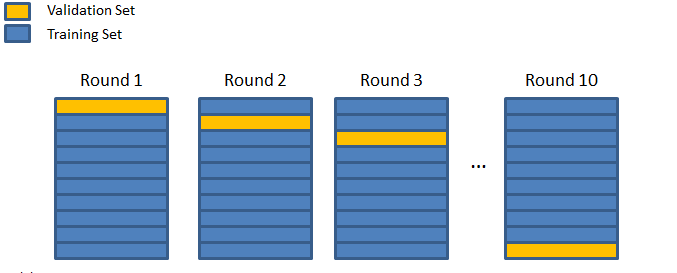


In [155]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ppn, X_combined_std, y_combined, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.10)


### K-Fold

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0041.png">


In [156]:
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]


### Shuffle Split

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0061.png">

In [157]:
from sklearn.model_selection import ShuffleSplit
X = np.arange(10)
ss = ShuffleSplit(n_splits=5, test_size=0.25,
    random_state=0)
for train_index, test_index in ss.split(X):
    print("%s %s" % (train_index, test_index))


[9 1 6 7 3 0 5] [2 8 4]
[2 9 8 0 6 7 4] [3 5 1]
[4 5 1 0 6 9 7] [2 3 8]
[2 7 5 8 0 3 4] [6 1 9]
[4 1 0 6 8 9 3] [5 2 7]


### Stratified K-Fold


<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0071.png">

In [158]:
from sklearn.model_selection import StratifiedKFold

X = np.ones(10)
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print("%s %s" % (train, test))



[2 3 6 7 8 9] [0 1 4 5]
[0 1 3 4 5 8 9] [2 6 7]
[0 1 2 4 5 6 7] [3 8 9]


## Multiclass Classification


There are two approaches:
1. One vs One (OVO) -- treat each pair as a binary classification problem $O(k^2)$
2. One vs All (OVA) -- train classifier for each label $O(k)$
  - Perceptron uses OVA rule: Predict with the class with the higest dot product.

In [178]:
X = df[['sepal_length','sepal_width']]
y = df['species_label']

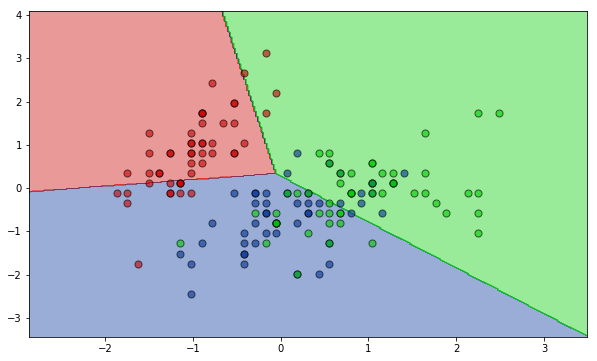

In [180]:
# standardize the features
sc = preprocessing.StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

# build a perceptron
ppn = linear_model.Perceptron(random_state=0, max_iter=100, tol=1e-6, n_jobs=3)
ppn.fit(X_std,y)

plot_decision(X=X_std, y=y, classifier=ppn)

In [181]:
# Let's do CV
scores = cross_val_score(ppn, X_std, y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.77 (+/- 0.12)
